<a href="https://colab.research.google.com/github/scw0310/ESAA/blob/main/2024-2%20project/ESAA_2024_2_%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2_%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIF 및 변수선택

In [ ]:
kic = pd.read_csv('최종_data_250129')

kic_gid = gpd.GeoDataFrame(
    kic,
    geometry=gpd.points_from_xy(kic['lon'], kic['lat']),
    crs="EPSG:4326"
)
kic_gid.head(1)

,Unnamed: 0,gbn,지식산업센터명,lon,lat,연면적,geometry,index_right,gid,공실률,...,주말_유동인구,카드매출,공시지가,용적률(%),건축 효율성,총층수,센터밀집도,5년이내_건축승인,용도지역,엔트로피계수
0,0,개별,분당테크노파크,127.151,37.405505,193217,POINT (127.15100 37.40550),1895,다사691340,0.615473,...,15339.237289,1.566531e+07,76500.0,171.82,4166.635,11.0,1,0,0,3.426611


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
kic_gid.rename(columns={'연면적': '건축연면적'}, inplace=True)
kic_gid.rename(columns={'상권': '상권규모'}, inplace=True)
kic_gid.rename(columns={'건축 효율성': '건축효율성'}, inplace=True)

In [ ]:
corr_merge = kic_gid[['공실률', '상권규모', '버스정류장_수', '건축연면적','야간시간대_유동인구',
       '출근시간대_유동인구', '업무시간대_유동인구', '퇴근시간대_유동인구', '야간활동시간대_유동인구', '주중_유동인구',
       '주말_유동인구', '카드매출', '공시지가', '용적률(%)', '건축효율성', '총층수', '영업기간_평균',
       '영업중인_상가수', '센터밀집도', '5년이내_건축승인','엔트로피계수', '용도지역']]

In [ ]:
# 모든 열에 대해 쉼표 제거 및 실수형 변환
corr_merge = corr_merge.apply(lambda x: x.replace({',': ''}, regex=True).astype(float) if x.dtype == 'object' else x)

In [ ]:
corr_matrix = corr_merge[['공실률', '상권규모', '버스정류장_수', '건축연면적','야간시간대_유동인구',
       '출근시간대_유동인구', '업무시간대_유동인구', '퇴근시간대_유동인구', '야간활동시간대_유동인구', '주중_유동인구',
       '주말_유동인구', '카드매출', '공시지가', '용적률(%)', '건축효율성', '총층수', '영업기간_평균',
       '영업중인_상가수', '센터밀집도', '5년이내_건축승인','엔트로피계수', '용도지역']].corr()

In [ ]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.filterwarnings(action='ignore')

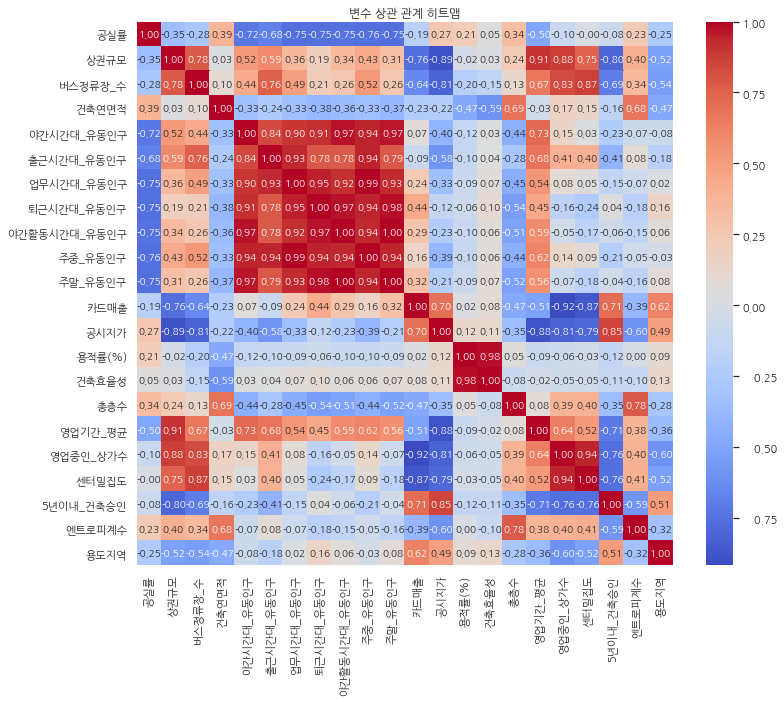

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 상관 관계 히트맵')  # 한국어 제목으로 변경
plt.show()

In [ ]:
# 다중공산성 확인

X = kic_gid[['공실률', '상권규모', '버스정류장_수', '건축연면적','야간시간대_유동인구',
       '출근시간대_유동인구', '업무시간대_유동인구', '퇴근시간대_유동인구', '야간활동시간대_유동인구', '주중_유동인구',
       '주말_유동인구', '카드매출', '공시지가', '용적률(%)', '건축효율성', '총층수', '영업기간_평균',
       '영업중인_상가수', '센터밀집도', '5년이내_건축승인','엔트로피계수', '용도지역']]

X = X.replace({',': ''}, regex=True).astype(float)

# 결측치를 0으로 대체
X = X.fillna(0)

# 무한값을 NaN으로 대체
X = X.replace([np.inf, -np.inf], np.nan)

# X의 데이터 타입을 float으로 변환
X = X.astype(float)

# 상수항 추가
X_const = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# VIF 계산 후 무한값을 NaN으로 대체
vif_data['VIF'] = vif_data['VIF'].replace([np.inf, -np.inf], np.nan)

# 모든 변수들의 VIF 출력
print("All Variables VIF:")
vif_data

All Variables VIF:


,Variable,VIF
0,const,1.311407e+03
1,공실률,3.460798e+00
2,상권규모,3.904741e+01
3,버스정류장_수,1.287153e+01
4,건축연면적,6.010739e+00
5,야간시간대_유동인구,7.229749e+05
6,출근시간대_유동인구,7.296656e+05
7,업무시간대_유동인구,2.520027e+06
8,퇴근시간대_유동인구,6.983916e+05
9,야간활동시간대_유동인구,4.186033e+05


In [ ]:
# VIF 값이 10 이상인 변수들만 출력
high_vif = vif_data[vif_data['VIF'] >= 10]
high_vif

,Variable,VIF
0,const,1.311407e+03
2,상권규모,3.904741e+01
3,버스정류장_수,1.287153e+01
5,야간시간대_유동인구,7.229749e+05
6,출근시간대_유동인구,7.296656e+05
7,업무시간대_유동인구,2.520027e+06
8,퇴근시간대_유동인구,6.983916e+05
9,야간활동시간대_유동인구,4.186033e+05
10,주중_유동인구,1.172018e+07
11,주말_유동인구,1.152930e+06


In [ ]:
# 일부 변수 제거하는 경우
X2 = kic_gid[['상권규모', '버스정류장_수', '건축연면적','업무시간대_유동인구', '카드매출','공시지가','용적률(%)',
             '총층수','영업기간_평균','영업중인_상가수','센터밀집도', '5년이내_건축승인','엔트로피계수', '용도지역']]

# 결측치를 0으로 대체
X2 = X2.fillna(0)

# 무한값을 NaN으로 대체
X2 = X2.replace([np.inf, -np.inf], np.nan)

# X의 데이터 타입을 float으로 변환
X2 = X2.astype(float)

# 상수항 추가
X2_const = add_constant(X2)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X2_const.columns
vif_data['VIF'] = [variance_inflation_factor(X2_const.values, i) for i in range(X2_const.shape[1])]

# VIF 계산 후 무한값을 NaN으로 대체
vif_data['VIF'] = vif_data['VIF'].replace([np.inf, -np.inf], np.nan)

# 모든 변수들의 VIF 출력
print("All Variables VIF:")
vif_data

All Variables VIF:


,Variable,VIF
0,const,354.580481
1,상권규모,7.597770
2,버스정류장_수,6.760655
3,건축연면적,3.949053
4,업무시간대_유동인구,3.237201
5,카드매출,4.655968
6,공시지가,5.805855
7,용적률(%),1.778337
8,총층수,2.462636
9,영업기간_평균,8.233746


최종데이터 생성
- data : 격자정보 및 지식산업센터정보 포함
- data_ft : 격자정보 및 지식산업센터정보 제외

In [ ]:
kic_gid.columns

Index(['Unnamed: 0', 'gbn', '지식산업센터명', 'lon', 'lat', '건축연면적', 'geometry',
       'index_right', 'gid', '공실률', '상권규모', '영업기간_평균', '영업중인_상가수', '버스정류장_수',
       '지하철역_수', '총_유동인구', '10대_유동인구', '20대_유동인구', '30대_유동인구', '40대_유동인구',
       '50대_유동인구', '60대_유동인구', '야간시간대_유동인구', '출근시간대_유동인구', '업무시간대_유동인구',
       '퇴근시간대_유동인구', '야간활동시간대_유동인구', '주중_유동인구', '주말_유동인구', '카드매출', '공시지가',
       '용적률(%)', '건축효율성', '총층수', '센터밀집도', '5년이내_건축승인', '용도지역', '엔트로피계수'],
      dtype='object')

In [ ]:
data = kic_gid.drop(['Unnamed: 0','index_right','지하철역_수','총_유동인구', '10대_유동인구', '20대_유동인구', '30대_유동인구', '40대_유동인구',
       '50대_유동인구', '60대_유동인구','야간시간대_유동인구', '출근시간대_유동인구','퇴근시간대_유동인구',
                    '야간활동시간대_유동인구', '주중_유동인구', '주말_유동인구', '건축효율성','gbn','lon', 'lat'], axis=1)
data.head(1)

,지식산업센터명,건축연면적,geometry,gid,공실률,상권규모,영업기간_평균,영업중인_상가수,버스정류장_수,업무시간대_유동인구,카드매출,공시지가,용적률(%),총층수,센터밀집도,5년이내_건축승인,용도지역,엔트로피계수
0,분당테크노파크,193217,POINT (127.15100 37.40550),다사691340,0.615473,3717,1997.921283,90,23,5358.567706,1.566531e+07,76500.0,171.82,11.0,1,0,0,3.426611


In [ ]:
data_ft = data.drop(['지식산업센터명', 'geometry', 'gid'], axis=1)
data_ft.head(1)

,건축연면적,공실률,상권규모,영업기간_평균,영업중인_상가수,버스정류장_수,업무시간대_유동인구,카드매출,공시지가,용적률(%),총층수,센터밀집도,5년이내_건축승인,용도지역,엔트로피계수
0,193217,0.615473,3717,1997.921283,90,23,5358.567706,1.566531e+07,76500.0,171.82,11.0,1,0,0,3.426611


In [ ]:
data.to_csv('최종data.csv', index=False, encoding='utf-8-sig')

In [ ]:
data_ft.to_csv('최종data_피처만.csv', index=False, encoding='utf-8-sig')

## 모델링 및 변수중요도

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 1. 명목형 및 수치형 피처 분리
numerical_features = data_ft.drop(['5년이내_건축승인','용도지역'], axis=1)  # 수치형 데이터 선택

# 2. 수치형 피처에 StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# 3. 결과 출력
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)
scaled_df['5년이내_건축승인'] = data_ft['5년이내_건축승인']
scaled_df['용도지역'] = data_ft['용도지역']
scaled_df.head(1)

,건축연면적,공실률,상권규모,영업기간_평균,영업중인_상가수,버스정류장_수,업무시간대_유동인구,카드매출,공시지가,용적률(%),총층수,센터밀집도,엔트로피계수,5년이내_건축승인,용도지역
0,3.456867,1.362214,-1.198355,0.392995,-1.559948,-0.602178,-1.830036,-0.01548,-1.87959,-2.568883,-0.618012,-1.965441,0.348956,0,0


In [ ]:
# 데이터
X = scaled_df.drop(['공실률'], axis=1)  # 독립 변수
y = scaled_df['공실률']  # 종속 변수

# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# 종속변수 왜도
y.skew()

0.24181788255535638

### 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=50, random_state=42,verbose = -1)

In [ ]:
# Random Forest 모델 훈련 및 예측
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGB 모델 훈련 및 예측
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# LGBM 모델 훈련 및 예측
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

In [ ]:
# MSE 계산
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))

# 성능 출력
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"LGBM Regression RMSE: {lgbm_rmse}")

Random Forest RMSE: 0.8687265716402941
XGBoost RMSE: 0.7499237260933265
LGBM Regression RMSE: 0.860342643727239


RandomForest

In [ ]:
# 하이퍼파라미터 그리드 설정
params = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 20, 30],
    }

rf_reg = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 최적의 파라미터를 찾기 위해 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 10}


In [ ]:
# 최적의 파라미터를 가진 모델 학습 및 예측
rf_reg = RandomForestRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 0.8577584372766147


XGB

In [ ]:
# 하이퍼파라미터 그리드 설정
params = {
    'max_depth': [None, 3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [10, 20, 30],
}

xgb_reg = XGBRegressor()

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator = xgb_reg,
    param_grid = params,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    verbose = 1,
    n_jobs = -1)

# 최적의 파라미터를 찾기 위해 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'max_depth': None, 'n_estimators': 10}


In [ ]:
# 최적의 파라미터를 가진 모델 학습 및 예측
xgb_reg = XGBRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGB RMSE: {xgb_rmse}")

XGB RMSE: 0.8361021488715091


LGBM

In [ ]:
# 하이퍼파라미터 그리드 설정
params = {
    'max_depth': [None, 3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

lgbm_reg = LGBMRegressor(random_state=42,verbose = 1)

grid_search = GridSearchCV(
    estimator=lgbm_reg,
    param_grid=params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26, number of used features: 0
[LightGBM] [Info] Start training from score 0.079411
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

In [ ]:
lgbm_reg = LGBMRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    random_state=42
)

lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
print(f"LGBM RMSE: {lgbm_rmse}")

LGBM RMSE: 0.860342643727239


xgb_reg 로 변수 중요도 파악

### 모델 변수 중요도 파악
Feature Importance :  
- 모든 Feature에서 하나의 Feature를 제거하고 학습해 성능을 측정했을 때 성능이 하락하는 만큼 제거한 Feature가 Prediction에 중요한 영향을 끼쳤다고 보는 것
- 단, 변수가 어떤 방향으로 영향을 미치는지 확인할 수 없음
- 중요도에 따라 모델 수정 시 해당 변수의 중요도가 inconsistent함

SHAP (SHapley Additive exPlanation)
- 변수중요도 뿐만 아니라 개별 예측값에 대한 각 변수들의 영향력을 모형 클래스에 상관없이 누적으로 배분하는 방식
- 인간의 생각과 유사한 해석을 제공하며, consistent하고 변수중요도의 방향성을 알 수 있음

해석 : https://moondol-ai.tistory.com/394

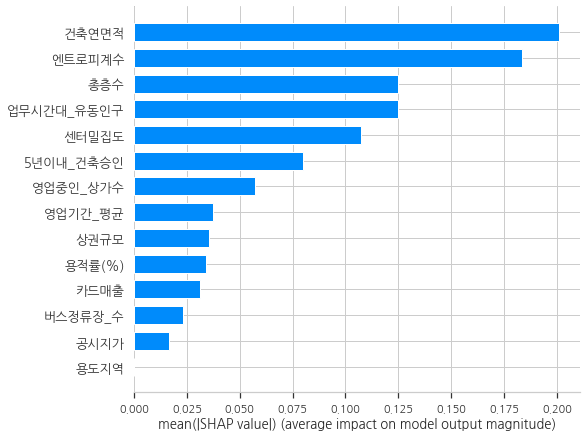

In [ ]:
import shap

# SHAP 값 계산
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(X_train)

# SHAP feature importance plot (피처 중요도 시각화)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

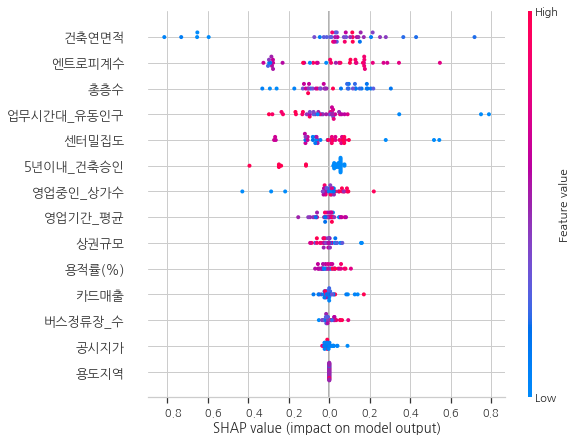

In [ ]:
# SHAP summary plot (전체 피처에 대한 기여도 시각화)
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)